# Neural Notwork Probabilistic Language Model
- These experiments focuses on the Neural Netwok Probabilistic Language Model by Bengio, 2003

- In this practical experiment, the data is processed such a way that
    - Any word having frequency less than 5 is pruned
    - And simulataneously the corresponding sentence is also removed.
- 8232 words have frequency less than 5, this could result to poor generalization - due to data sparsity.
- As a result, the vocab size was pruned down from 11466 to 3208


In [1]:
from collections import Counter
import torch
import torch.nn.functional as F
import re
import matplotlib.pyplot as plt

# Load dataset

In [2]:
with open('input.txt', 'r') as file:
    text = file.read().lower().strip()
tokens = re.findall(r"\w+|[^\w\s]", text)


In [3]:
n = len(tokens)
n

262927

In [4]:
unique_counts = Counter(tokens)
unique_counts

Counter({',': 19846,
         ':': 10316,
         '.': 7885,
         'the': 6287,
         "'": 6187,
         'and': 5690,
         'i': 5111,
         'to': 4934,
         'of': 3760,
         ';': 3628,
         'you': 3211,
         'my': 3120,
         'a': 3018,
         'that': 2664,
         '?': 2462,
         'in': 2403,
         '!': 2172,
         'is': 2118,
         'not': 2015,
         'for': 1926,
         '-': 1897,
         's': 1859,
         'with': 1813,
         'it': 1773,
         'me': 1769,
         'be': 1710,
         'your': 1686,
         'he': 1606,
         'his': 1552,
         'this': 1509,
         'but': 1507,
         'have': 1450,
         'd': 1445,
         'thou': 1421,
         'as': 1420,
         'what': 1211,
         'him': 1209,
         'so': 1177,
         'thy': 1059,
         'will': 1053,
         'we': 938,
         'king': 925,
         'by': 911,
         'all': 910,
         'no': 906,
         'shall': 849,
         'her': 829

In [5]:
len(unique_counts)

11466

In [6]:
total_less_than_5 = 0
for counts in unique_counts.values():
    if counts < 5:
        total_less_than_5 +=1
total_less_than_5

8232

------------

# Preprocessing the data
- There number of words in the file, which repeats rarely.
- If we use those words in our neural network model, the model will simply overfit for that word.
- Thus we will remove those sentences which has words repeated less than 5 times.

In [7]:
## Sentences 
sentences = [line.lower().strip() for line in open('input.txt', 'r') if line.strip()]

In [8]:
len(sentences)

32777

In [9]:
low_freq_word = {word for word, cnt in unique_counts.items() if cnt < 5}
print("Number of low frequency words: ",len(low_freq_word))

Number of low frequency words:  8232


### Remove sentences with low frequency words

In [10]:
training_data = []
for sent in sentences:
    sent_tokens = re.findall(r"\w+|[^\w\s]", sent.lower())
    if not any(tok in low_freq_word for tok in sent_tokens):
        training_data.append(sent)

In [11]:
len(training_data)

22441

### All words to be used for training the model

In [12]:
training_word = []

for sent in training_data:
    sent_tokens = re.findall(r"\w+|[^\w\s]", sent.lower())
    training_word.append("<s>")
    training_word.extend(sent_tokens)
    training_word.append("</s>")


In [13]:
unique_words = Counter(training_word)
print("Final number of Vocab: ",len(unique_words))

Final number of Vocab:  3208


---------------------

# Mapping Words to an Index and Vice-Versa

In [14]:
vocab = sorted(set(training_word))

In [15]:
len(vocab)

3208

In [16]:
stoi = {word: ix for ix, word in enumerate(vocab)}
itos = {ix: word for word, ix in stoi.items()}

In [17]:
stoi

{'!': 0,
 "'": 1,
 ',': 2,
 '-': 3,
 '.': 4,
 '3': 5,
 ':': 6,
 ';': 7,
 '</s>': 8,
 '<s>': 9,
 '?': 10,
 'a': 11,
 'abhorson': 12,
 'abide': 13,
 'able': 14,
 'aboard': 15,
 'about': 16,
 'above': 17,
 'abraham': 18,
 'abroad': 19,
 'absence': 20,
 'absent': 21,
 'absolute': 22,
 'abuse': 23,
 'abused': 24,
 'accept': 25,
 'access': 26,
 'accident': 27,
 'according': 28,
 'account': 29,
 'accursed': 30,
 'accusation': 31,
 'accuse': 32,
 'accused': 33,
 'achieve': 34,
 'acquaint': 35,
 'acquainted': 36,
 'act': 37,
 'action': 38,
 'actions': 39,
 'acts': 40,
 'add': 41,
 'adieu': 42,
 'admit': 43,
 'ado': 44,
 'adrian': 45,
 'advance': 46,
 'advanced': 47,
 'advantage': 48,
 'adventure': 49,
 'adversaries': 50,
 'advice': 51,
 'advise': 52,
 'advised': 53,
 'advocate': 54,
 'aedile': 55,
 'afeard': 56,
 'affairs': 57,
 'affect': 58,
 'affection': 59,
 'affections': 60,
 'affliction': 61,
 'afford': 62,
 'affords': 63,
 'afore': 64,
 'afraid': 65,
 'after': 66,
 'afternoon': 67,
 'agai

In [18]:
itos

{0: '!',
 1: "'",
 2: ',',
 3: '-',
 4: '.',
 5: '3',
 6: ':',
 7: ';',
 8: '</s>',
 9: '<s>',
 10: '?',
 11: 'a',
 12: 'abhorson',
 13: 'abide',
 14: 'able',
 15: 'aboard',
 16: 'about',
 17: 'above',
 18: 'abraham',
 19: 'abroad',
 20: 'absence',
 21: 'absent',
 22: 'absolute',
 23: 'abuse',
 24: 'abused',
 25: 'accept',
 26: 'access',
 27: 'accident',
 28: 'according',
 29: 'account',
 30: 'accursed',
 31: 'accusation',
 32: 'accuse',
 33: 'accused',
 34: 'achieve',
 35: 'acquaint',
 36: 'acquainted',
 37: 'act',
 38: 'action',
 39: 'actions',
 40: 'acts',
 41: 'add',
 42: 'adieu',
 43: 'admit',
 44: 'ado',
 45: 'adrian',
 46: 'advance',
 47: 'advanced',
 48: 'advantage',
 49: 'adventure',
 50: 'adversaries',
 51: 'advice',
 52: 'advise',
 53: 'advised',
 54: 'advocate',
 55: 'aedile',
 56: 'afeard',
 57: 'affairs',
 58: 'affect',
 59: 'affection',
 60: 'affections',
 61: 'affliction',
 62: 'afford',
 63: 'affords',
 64: 'afore',
 65: 'afraid',
 66: 'after',
 67: 'afternoon',
 68: '

In [19]:
len(stoi), len(itos)

(3208, 3208)

In [20]:
stoi['citizen']

508

# Creating training dataset

- Each word in the vocab will have its own d dimensional vector - word vector
- The context is taken as n words, for this experiment n = 3
- The n+1th word will be predicted by the model 

In [21]:
training_data[:5]

['first citizen:',
 'before we proceed any further, hear me speak.',
 'all:',
 'speak, speak.',
 'first citizen:']

In [22]:
def build_dataset(training_data, context_size):    
    padding_idx = stoi['<s>']
    X, Y = [], []

    for sent in training_data: 
        # Use the same tokenization as vocabulary building
        sentence_tokens = re.findall(r"\w+|[^\w\s]", sent.lower()) + ["</s>"]
        
        # Initialize context with start tokens
        context = [padding_idx] * context_size 
        
        for token in sentence_tokens:
            if token in stoi:
                ix = stoi[token]
                X.append(context)
                Y.append(ix)
                context = context[1:] + [ix] 

    # Convert lists to tensors
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    return X, Y

In [23]:
import random
random.seed(42)
random.shuffle(training_data)
n1 = int(0.8 * len(training_data))
n2 = int(0.9 * len(training_data))

context_size = 7
Xtr, Ytr = build_dataset(training_data[:n1], context_size)
Xval, Yval = build_dataset(training_data[n1:n2], context_size)
Xte, Yte = build_dataset(training_data[n2:], context_size)


In [24]:
"training: ",n1, "validation: ",n2 - n1, "testing: ",len(training_data) - n2

('training: ', 17952, 'validation: ', 2244, 'testing: ', 2245)

# Lookup table C - (NN layer 1)

- For first experiment we will consider the size of dimension d = 30

In [25]:
dimn = 64
C = torch.randn((len(vocab), dimn))
#C

- In simple nnlm  `X_enc @ W`  works as lookup table

- Here we will use the `X[i] @ C` to look up in the C table.  (Interpreting `X[i]` (words) as the `X_enc` data and context vector of each word as the Weights in `simple n-gram nn model`)

- Though we will directly access the C table using stoi of words uing X.
- Because OHE of word at index 5 will give same results. -> Liner layer
- So ultimately, it is like a 1st neural layer (linear layer).

In [26]:
C[5]

tensor([-0.5792, -0.1261, -1.1635, -1.8055, -0.4513, -0.2211,  1.4452, -0.6370,
        -1.0169, -1.1219, -2.5496,  0.1020,  1.5687, -0.0355,  0.9913, -0.3545,
         0.3417,  1.3467, -1.5327, -1.3333,  0.9807, -0.3497, -0.0567, -0.6619,
         0.4666, -0.1163, -0.4812,  0.0482, -0.4472, -1.1033,  0.6067,  1.1065,
        -0.6525,  1.0339, -0.7067, -2.7295, -1.0902, -1.5139, -0.8118, -0.4183,
         1.1719,  1.0585, -0.0535,  0.0076, -1.3819,  1.3628, -0.0540, -0.9534,
        -0.8989, -0.9598,  0.1517,  0.7146,  0.2708, -0.4750,  0.3582,  0.6793,
        -1.2722,  0.3301,  0.0880, -0.1749, -0.8726,  0.6843,  0.7532,  0.4954])

In [27]:
F.one_hot(torch.tensor(5), num_classes=3208).float() @ C

tensor([-0.5792, -0.1261, -1.1635, -1.8055, -0.4513, -0.2211,  1.4452, -0.6370,
        -1.0169, -1.1219, -2.5496,  0.1020,  1.5687, -0.0355,  0.9913, -0.3545,
         0.3417,  1.3467, -1.5327, -1.3333,  0.9807, -0.3497, -0.0567, -0.6619,
         0.4666, -0.1163, -0.4812,  0.0482, -0.4472, -1.1033,  0.6067,  1.1065,
        -0.6525,  1.0339, -0.7067, -2.7295, -1.0902, -1.5139, -0.8118, -0.4183,
         1.1719,  1.0585, -0.0535,  0.0076, -1.3819,  1.3628, -0.0540, -0.9534,
        -0.8989, -0.9598,  0.1517,  0.7146,  0.2708, -0.4750,  0.3582,  0.6793,
        -1.2722,  0.3301,  0.0880, -0.1749, -0.8726,  0.6843,  0.7532,  0.4954])

`- Same result`

In [28]:
Xtr[13, 2]

tensor(9)

In [29]:
# Word at index 13,2 -> having index 3082
C[Xtr[13, 2]]

tensor([-0.4855, -0.8667, -0.2650, -1.2204, -0.2795, -0.6402, -0.2814,  2.5721,
         0.5141, -0.6356, -0.6399,  0.8734,  1.4687, -0.6907,  0.0640,  0.7381,
         0.9943,  0.3447, -2.0352,  0.6697,  0.6572,  1.4276,  0.2714,  1.0366,
         0.8301, -1.8552, -2.0683,  0.4238, -0.0972, -1.3050,  0.8733, -0.6501,
        -1.4317,  0.0851,  0.0082, -0.7296, -0.3710,  0.2409,  0.6899, -1.5002,
         0.4650,  1.6990, -1.1374, -0.5016,  1.4427, -1.0177,  0.1441,  0.8408,
        -0.7387, -0.4628,  0.6648, -2.5303,  2.2186,  0.9067, -0.9681, -1.4965,
        -2.4239,  0.4227, -0.2666,  1.4323,  0.7645, -0.3906, -0.8747, -0.3414])

In [30]:
# Word with index 3082
C[3082]

tensor([-2.2669, -0.0732,  0.3932, -1.4740, -1.8216, -0.2591, -0.4895, -0.2393,
        -1.0386, -0.2941, -0.8343, -0.9728, -0.8535,  0.7064, -1.2094, -0.7633,
        -1.8666,  1.2902,  0.3726,  0.8889,  0.0973,  0.4299,  1.5494, -1.4009,
        -0.8258, -0.9597, -1.9218, -0.6248,  0.3555, -1.1653,  0.4788,  0.4735,
         0.4163, -1.7405, -0.6462, -1.6321,  0.8508, -1.4375,  0.1109,  0.1132,
         0.0819, -0.2174,  0.7670,  0.8474, -1.6388, -0.0742, -0.9239, -1.5211,
        -0.9508,  0.1909, -0.5486, -0.3856, -0.1232,  0.3988,  0.0056, -0.7542,
        -1.0841,  0.4892, -0.2483, -1.0184,  0.6523,  0.5343,  0.0835, -0.8526])

### Embedding lookup is equivalent to one-hot + linear layer.
- X has shape (total_words_in_trainig_data, context_size)
- X[13, 2] is a scalar integer tensor → the word index 3082
- C has shape (vocab_size, embedding_dim) → each row is one word’s embedding

` C[X[13, 2]] == C[3082] `

In [31]:
# Embeddings
emb = C[Xtr]
emb.shape

torch.Size([149078, 7, 64])

# Neural Network Layer 2 

- Number of input for L2 -> `no. of embeddings(dimension) * context_size` = 30 * 3 = 90
- Number of neurons exp 1 = 100

In [32]:
W1 = torch.randn((dimn*context_size, 250))
b1 = torch.randn((250))

- Matrix multiplication of `emb @ W1` is not possible as the size is not same
- If we look at the embeddings, they are stacked up.
- Thus, we will have to concatenate these stacks of word vectors

- emb shape -> `(149078, 3, 30)`
- We have convert it to -> `(149078, 90)`


In [33]:
# torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :], emb[:, 3, :]..........., emb[:, 29, :]], 1)

# torch.cat(torch.unbind(emb, 1), 1).shape  --- Inefficient, creates whole new tensor

# - In pytorch there is something called storage, where the data is stored in 1 dimension ->check with a.storage()
# - READ pytorch internals by ERIC

# emb.view(-1, 90).shape   -- Pytorch will figure it out itself by checking how many elements are and how it can satisfy the tensor
emb.view(-1, dimn*context_size).shape

torch.Size([149078, 448])

In [34]:
# h = emb.view([186338, 90]) @ W1 + b1 ------exp 1
h = torch.tanh(emb.view(-1, context_size * dimn)) @ W1 + b1
h.shape

torch.Size([149078, 250])

# Output Layer

In [35]:
W2 = torch.randn((250, len(vocab)))
b2 = torch.randn(len(vocab))

- While experimenting some of the probs where Nan
- This is because the logits are too big. max(logits) = tensor(375.3132)
- For which the logits.exp() is `Infinity`
- Thus for normalization -> `logits = logits - logits.max(dim=1, keepdim=True).values`

In [36]:
logits = h @ W2 + b2
logits.shape

torch.Size([149078, 3208])

In [37]:
# Normalizing logits as the max value is 375.3132, 
# for which exp is Infinity
# logits = logits - logits.max(dim=1, keepdim=True).values

- The max logits problem is solved but due to the above normalization the small logits became more small as expected

In [38]:
# The minimum  logits are not bugs, but they do create problem in calculaing softmax manually
# As for exp(-689) {and no.s around it} is too small, floating-point underflow occurs
# Thus the exp(-689) is 0
# (logits).min() -> tensor(-689.9708)


In [39]:
# counts = logits.exp() -> gives 0 values for too low logits
# probs = counts / counts.sum(1,keepdim=True) -> gives probs equal to 0
# loss = - probs[torch.arange(len(X)), Y].log().mean()  -> log of 0 is inf
# loss  -> loss = tensor(inf)

- The probs do not have any infinite or Nan values anymore
- But some of the probs are 0, this is the result of floating point underflow which arises dues to 
    - manually computing softmax
    - PyTorch avoids this issue by computing the loss using numerically stable log-softmax (e.g. cross_entropy), rather than explicit softmax.

In [40]:
# 1. Stabilize logits
logits = logits - logits.max(dim=1, keepdim=True).values

# 2. Compute log-softmax safely
log_probs = logits - torch.logsumexp(logits, dim=1, keepdim=True)

# 3. Negative log-likelihood loss
loss = -log_probs[torch.arange(len(Ytr)), Ytr].mean()
loss

# This all can be done using (for classification)
# F.cross_entropy(logits, Y)
    # No need to create new tensors like count, probs -> ineffiencient
    # 

tensor(773.9404)

# Putting it altogether for understanding

## Experiment 1

In [41]:
Xtr.shape, Ytr.shape

(torch.Size([149078, 7]), torch.Size([149078]))

In [53]:
context_size = 7
dimn = 70
l1_neurons = 300

In [54]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((len(vocab), dimn), generator=g)
W1 = torch.randn((context_size*dimn,l1_neurons), generator=g)
b1 = torch.randn((l1_neurons), generator=g)
W2 = torch.randn((l1_neurons, len(vocab)), generator=g)
b2 = torch.randn(len(vocab), generator=g)
parameters = [C, W1, W2, b1, b2]
sum(p.nelement() for p in parameters) # Total number of parameters

1337468

In [55]:
for p in parameters:
    p.requires_grad = True

In [45]:
# Experimenting with number of lr to choose the good one -> -0.1
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10 ** lre

In [90]:
batch_size = 32
base_lr = 0.1   
decay = 0.99995

# lri = []
stepi = []
lossi = []

for i in range(20000):

    # ---- Mini-batch ----
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))
    Xb = Xtr[ix]
    Yb = Ytr[ix]

    # ---- Forward pass ----
    emb = C[Xb]
    h = torch.tanh(emb.view(-1, context_size*dimn) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)
 
    # ---- Backward pass ----
    for p in parameters:
        p.grad = None
    loss.backward()

    # ---- Update ----
    # lr = 0.1  # if i < 10000 else 0.01
    lr = base_lr * (decay ** i)
    with torch.no_grad():
        for p in parameters:
            p -= lr * p.grad

    # track stats
    # used to plot loss against lr's
    # lri.append(lr[i])
    stepi.append(i)
    lossi.append(loss.log10().item())


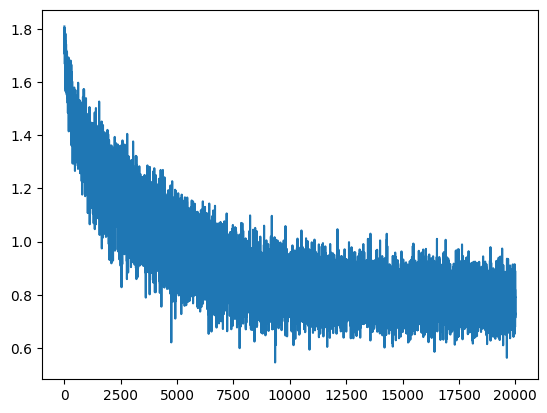

In [57]:
plt.plot(stepi, lossi)

In [91]:
with torch.no_grad():
    emb = C[Xtr] 
    h = torch.tanh(emb.view(-1, context_size*dimn) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr)
loss

tensor(5.1854)

In [92]:
with torch.no_grad():
    emb = C[Xval] 
    h = torch.tanh(emb.view(-1, context_size*dimn) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yval)
loss

tensor(5.5508)

In [93]:
context_size = 7
padding_idx = stoi['<s>']

In [94]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [padding_idx] * context_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 8:
        break
    
    print(' '.join(itos[i] for i in out))

you : </s>
vincentio : </s>
have paulina : but is : you </s>
say ' s here of body me , </s>
</s>
, provost and he him lord had effect live , </s>
wilt thought queen first will all man vienna flood lovel appear bred resist deny soft curses labour appear best stir fierce refuse grows truly thing ariel mean chamber conjure naked such bands split weather rivers quarter delay sky keeper begins troubled kiss kinsman drops cure ? </s>
words : </s>
sycorax , not her death love make being thee , </s>
, duke : </s>
, i king have thought , to upon </s>
gates elbow there marcius away goodness seest precious full delight remember judgment taken thoughts thinks seal crow edward disgraced manner corruption game methinks record table until parents st dozen cannot ruin find fancy whither always isle deserve profit also clifford muster still wrought hanging big turn seven heel poverty truth sore together nurse quick angelo purge abide rose seen die </s>
froth my i have i , at your is ; </s>
several wert

# Best Results

## Loss
    - Trianing loss : 4.6017
    - Validation loss : 4.9050


## Parameters
    - Dimension of word embeddings -> 30
    - context_size -> 3
    - 1st layer -> 100 neurons
    - 2nd layer (O/P) -> len(vocab)
## Output
1. you : 
2. and believe - have mustard , but is : you </s>
3. say ' s here of body me , </s>
4. servant , </s>
5. and he him ? </s>
6. effect , plague , </s>
7. o ? first will thy man ! </s>
8. menenius : </s>
9. my claim king that it would a side : and now you made be favours . </s>
10. all but day is . </s>
11. this kind be saw , ' tis all good triumph it we words : </s>
12. no remain not her death . make be affairs them after alone with receive </s>
13. camillo , </s>
14. escalus : </s>
15. sicinius : </s>
16. i elbow there marcius edward cleomenes unto ' d </s>
17. king richard iii : </s>
18. pompey , </s>
19. you object , and crown ; </s>
20. we valiant . </s>